This code will use the parameters which were trained using gridsearch separately. Using those parameters, we will train the mlp model on the following processed diabetes datasets:

1. diabetes_012_health_indicators_BRFSS2015.csv
2. diabetes_binary_5050split_health_indicators_BRFSS2015.csv

After the training of the model we will explore the following metrics on the test dataset:

1. classification_report
2. confusion_matrix (heatmap)
3. ROC Curve (only for 5050 binary split dataset)

In [1]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Defining the model for 3-Class Diabetes Data

In [2]:
# This function will train an mlp classifier on imbalance diabetes dataset and return the predictions along with the correct labels
def mlp_classifer_012_train_evaluate(train_data_file_012, test_data_file_012):
    train_data = pd.read_csv(train_data_file_012)
    test_data = pd.read_csv(test_data_file_012)
    
    # Extracting the input and output features from the train and test data
    X_train = train_data.drop(['Diabetes_012'], axis=1)
    y_train = train_data['Diabetes_012']
    
    X_test = test_data.drop(['Diabetes_012'], axis=1)
    y_test = test_data['Diabetes_012']
    
    # Training the Model
    mlp_classifer_012 = MLPClassifier(hidden_layer_sizes= (64, 64), activation = 'relu', alpha=0.01, max_iter = 30, random_state = 42, solver = 'adam', verbose = True)
    mlp_classifer_012.fit(X_train, y_train)
    
    # Estimating the output
    y_pred = mlp_classifer_012.predict(X_test)
    
    return (y_test, y_pred)

## Training the model

In [3]:
train_data_file_012 = "Dataset/train_012.csv"
test_data_file_012 = "Dataset/test_012.csv"

y_test, y_pred = mlp_classifer_012_train_evaluate(train_data_file_012, test_data_file_012)

Iteration 1, loss = 0.41348346
Iteration 2, loss = 0.39798539
Iteration 3, loss = 0.39654522
Iteration 4, loss = 0.39568325
Iteration 5, loss = 0.39508681
Iteration 6, loss = 0.39467972
Iteration 7, loss = 0.39443761
Iteration 8, loss = 0.39406303
Iteration 9, loss = 0.39395846
Iteration 10, loss = 0.39366435
Iteration 11, loss = 0.39347873
Iteration 12, loss = 0.39343300
Iteration 13, loss = 0.39357893
Iteration 14, loss = 0.39312727
Iteration 15, loss = 0.39283409
Iteration 16, loss = 0.39311141
Iteration 17, loss = 0.39264126
Iteration 18, loss = 0.39269942
Iteration 19, loss = 0.39256689
Iteration 20, loss = 0.39236966
Iteration 21, loss = 0.39225361
Iteration 22, loss = 0.39235107
Iteration 23, loss = 0.39216709
Iteration 24, loss = 0.39215845
Iteration 25, loss = 0.39194621
Iteration 26, loss = 0.39187023
Iteration 27, loss = 0.39177857
Iteration 28, loss = 0.39181418
Iteration 29, loss = 0.39180822
Iteration 30, loss = 0.39176844


### Evaluating the Model Metrics

In [4]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.56      0.18      0.27      7069

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.40     50736
weighted avg       0.80      0.85      0.81     50736



<Axes: >

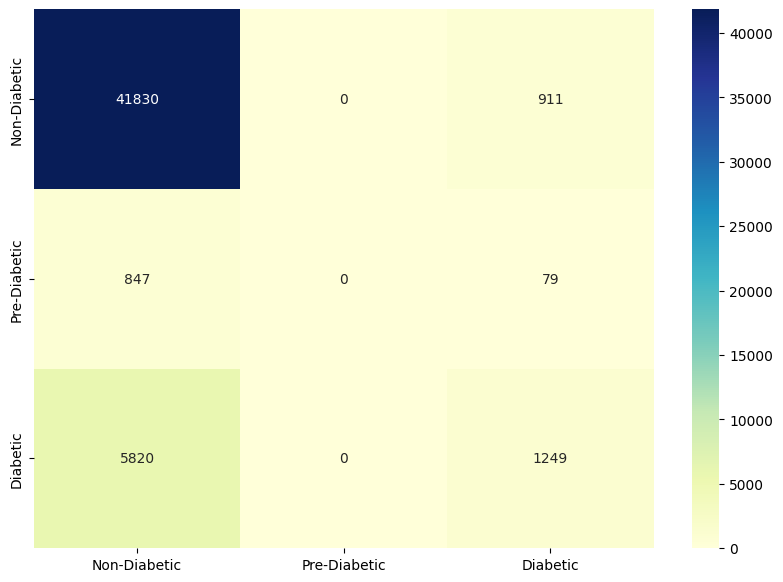

In [5]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index = [i for i in ['Non-Diabetic', 'Pre-Diabetic', 'Diabetic']], columns = [i for i in ['Non-Diabetic', 'Pre-Diabetic', 'Diabetic']])
plt.figure(figsize = (10,7))
sn.heatmap(cm_df, cmap="YlGnBu", fmt='g', annot=True)

# Defining the model for 2-Class Binary Split Data

In [6]:
# This function will train an mlp classifier on balanced diabetes dataset (50/50 Split) and return the predictions along with the correct labels
def mlp_classifer_binary_split_train_evaluate(train_data_file_binary_split, test_data_file_binary_split):
    train_data = pd.read_csv(train_data_file_binary_split)
    test_data = pd.read_csv(test_data_file_binary_split)
    
    # Extracting the input and output features from the train and test data
    X_train = train_data.drop(['Diabetes_binary'], axis=1)
    y_train = train_data['Diabetes_binary']
    
    X_test = test_data.drop(['Diabetes_binary'], axis=1)
    y_test = test_data['Diabetes_binary']
    
    # Training the Model
    mlp_classifer_binary_split = MLPClassifier(hidden_layer_sizes= (64, 64), activation = 'tanh', alpha=0.01, max_iter = 30, solver = 'adam', verbose = True, random_state = 42)
    mlp_classifer_binary_split.fit(X_train, y_train)
    
    # Estimating the output
    y_pred = mlp_classifer_binary_split.predict(X_test)
    
    # Calculating the fpr, tpr and roc_auc_score to draw the ROC curve
    fpr, tpr, _ = roc_curve(y_test, mlp_classifer_binary_split.predict_proba(X_test)[:,1])
    roc_auc_val = roc_auc_score(y_test, mlp_classifer_binary_split.predict_proba(X_test)[:,1])
    
    return (y_test, y_pred, fpr, tpr, roc_auc_val)

## Training the model

In [7]:
train_data_file_binary_split = "Dataset/train_binary_split.csv"
test_data_file_binary_split = "Dataset/test_binary_split.csv"

y_test, y_pred, fpr, tpr, roc_auc_val = mlp_classifer_binary_split_train_evaluate(train_data_file_binary_split, test_data_file_binary_split)

Iteration 1, loss = 0.52848930
Iteration 2, loss = 0.51332728
Iteration 3, loss = 0.51055742
Iteration 4, loss = 0.50879906
Iteration 5, loss = 0.50866677
Iteration 6, loss = 0.50696033
Iteration 7, loss = 0.50640731
Iteration 8, loss = 0.50700468
Iteration 9, loss = 0.50563678
Iteration 10, loss = 0.50552383
Iteration 11, loss = 0.50518642
Iteration 12, loss = 0.50453604
Iteration 13, loss = 0.50491888
Iteration 14, loss = 0.50491077
Iteration 15, loss = 0.50469685
Iteration 16, loss = 0.50359450
Iteration 17, loss = 0.50388794
Iteration 18, loss = 0.50348224
Iteration 19, loss = 0.50300684
Iteration 20, loss = 0.50361014
Iteration 21, loss = 0.50300293
Iteration 22, loss = 0.50267305
Iteration 23, loss = 0.50272556
Iteration 24, loss = 0.50303126
Iteration 25, loss = 0.50243603
Iteration 26, loss = 0.50255995
Iteration 27, loss = 0.50201412
Iteration 28, loss = 0.50264185
Iteration 29, loss = 0.50192347
Iteration 30, loss = 0.50149975


### Evaluating the Model Metrics

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.76      0.75      7070
         1.0       0.75      0.74      0.75      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



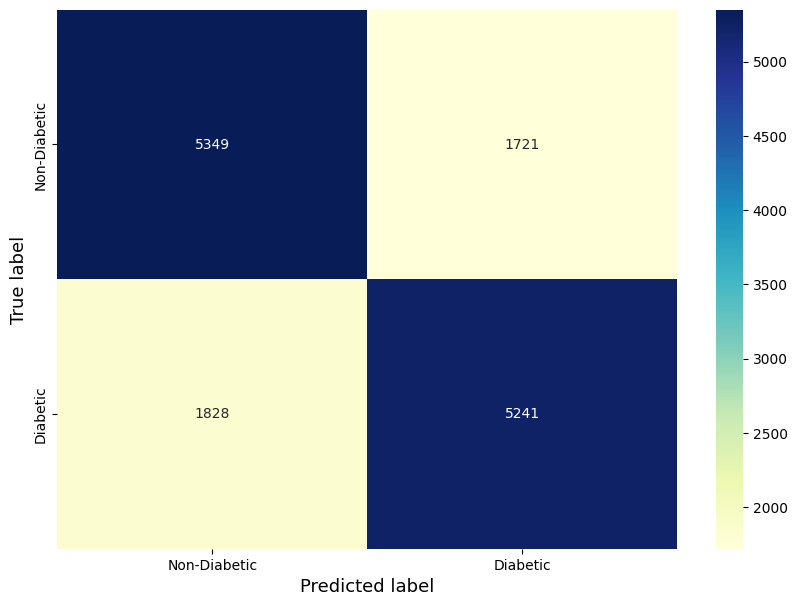

In [9]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index = [i for i in ['Non-Diabetic', 'Diabetic']], columns = [i for i in ['Non-Diabetic', 'Diabetic']])
plt.figure(figsize = (10,7))
sn.heatmap(cm_df,  cmap="YlGnBu", fmt='g', annot=True)
plt.xlabel('Predicted label',fontsize = 13)
plt.ylabel('True label',fontsize = 13)
plt.show()

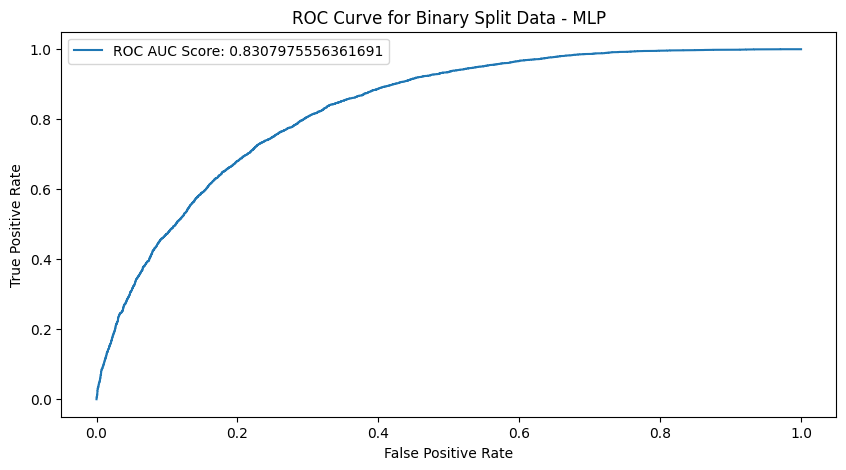

In [10]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label=f"ROC AUC Score: {roc_auc_val}")
plt.title('ROC Curve for Binary Split Data - MLP')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()